# Computational Lab #3: introduction to iterative methods
## Math 56, Winter 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lab3_helper_funcs import *

# Problem 1

In this question, you will compare Richardson's method (gradient descent with fixed stepsize) with steepest descent (with variable stepsize).

In [2]:
n = 200
np.random.seed(0)
A = np.random.normal(size=n)
A = (A.T @ A) + 1e-1*np.eye(n)
xtrue = np.random.normal(size=n)
b = A @ xtrue

**Part (a):** Complete the following functions for Richardson's method and steepest descent. 

In [181]:
def richardson(A, b, n_iterations=25, alpha=1.0, x0=None):
    
    # Initialization if none given
    if x0 is None:
        x = np.zeros(len(b))
    else:
        x = x0.copy()


    r = b - A @ x
    residual_norms = [ np.linalg.norm(r) ]
    solution_history = [ x.copy() ] 
    for j in range(n_iterations):
        
        ## Your code here


        residual_norms.append( np.linalg.norm(r) )
        solution_history.append(x.copy())

    return x, residual_norms, solution_history


In [182]:
def steepest_descent(A, b, n_iterations=25, x0=None):

    # Initialization if none given
    if x0 is None:
        x = np.zeros(len(b))
    else:
        x = x0.copy()

    r = b - A @ x
    residual_norms = [ np.linalg.norm(r) ]
    solution_history = [ x.copy() ] 
    for j in range(n_iterations):
        
        # Your code here

        residual_norms.append( np.linalg.norm(r) )
        solution_history.append(x.copy())

    return x, residual_norms, solution_history

    

**Part (b):** Make a plot (or two) that verifies that Richardson's method converges when the stepsize parameter satisfies  $\alpha < \frac{2}{\lambda_{\text{max}}(\mathbf{A})}$.

**Part (c):** Compare the performance of steepest descent with Richardson's method (using a good stepsize). What do you observe?

# Problem 2

Next, we will compare steepest descent with the conjugate gradient method.

In [3]:
A = np.load("q2_A.npy")
n = A.shape[0]
xtrue = np.ones(n)
b = A @ xtrue

**Part (a):** Complete the following function for the conjugate gradient (CG) method.

In [204]:
def conjugate_gradients(A, b, n_iterations=25, x0=None):

    # Initialization if none given
    if x0 is None:
        x = np.zeros(len(b))
    else:
        x = x0.copy()

    r = b - A @ x # set r0
    d = r # set d0 = r0

    residual_norms = [ np.linalg.norm(r) ]
    solution_history = [ x.copy() ] 
    for j in range(n_iterations):

        # Your code here
        

        residual_norms.append( np.linalg.norm(r) )
        solution_history.append(x.copy())

    return x, residual_norms, solution_history

    

**Part (b):** Make a plot using ``plt.semilogy()`` which verifies the error bound
$$
\| \mathbf{x}^* - \mathbf{x}_k \|_{\mathbf{A}} \leq \left( \frac{ \kappa - 1  }{ \kappa + 1 } \right)^k \| \mathbf{x}^* - \mathbf{x}_0 \|_{\mathbf{A}}
$$
for steepest descent, as well as the error bound
$$
\| \mathbf{x}^* - \mathbf{x}_k \|_{\mathbf{A}} \leq 2 \left( \frac{ \sqrt{\kappa} - 1  }{ \sqrt{\kappa} + 1 } \right)^k \| \mathbf{x}^* - \mathbf{x}_0 \|_{\mathbf{A}}
$$
for the CG method. Describe anything that you notice about the behavior of the curves.

**Response:** 

**Part (c):** Based on our discussions in class, can you explain why the CG method converges so quickly for this matrix $\mathbf{A}$?

# Problem 3

In this problem, you will investigate the preconditioned conjugate gradient method. Load the matrices $\mathbf{L}$ and $\mathbf{W}$, and then form the matrix $\mathbf{A} = \mathbf{L}^T \mathbf{W} \mathbf{L}$.

In [44]:
L = np.load("q3_L.npy")
W = np.load("q3_W.npy")
A = L.T @ W @ L

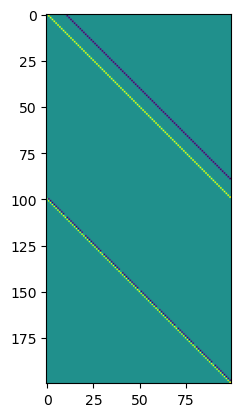

In [45]:
plt.imshow(L)
plt.show()

**Part (a):** Draw a random vector $\mathbf{b}$ and solve $\mathbf{A} \mathbf{x} = \mathbf{b}$ using CG. Then, solve the same system but using preconditioned CG with preconditioner $\mathbf{M} = \mathbf{L}^T \mathbf{L}$. Make a plot of the iteration index versus the residual norm. 

In [46]:
np.random.seed(0)
M = L.T @ L
b = np.random.normal(size=A.shape[0])

In [48]:
def preconditioned_conjugate_gradients(A, b, M, n_iterations=25, x0=None):

    if x0 is None:
        x = np.zeros(len(b))
    else:
        x = x0.copy()

    r = b - A @ x  # Initial residual r0
    z = np.linalg.solve(M, r)  # Preconditioned residual z0
    d = z.copy()  # Initial direction

    residual_norms = [np.linalg.norm(r)]
    solution_history = [x.copy()]

    for j in range(n_iterations):
        Ad = A @ d
        alpha = np.dot(r, z) / np.dot(d, Ad)  # Step size
        x += alpha * d  # Update solution
        r_new = r - alpha * Ad  # Update residual
        z_new = np.linalg.solve(M, r_new)  # Apply preconditioner
        beta = np.dot(r_new, z_new) / np.dot(r, z)  # Update coefficient
        d = z_new + beta * d  # Update direction

        r, z = r_new, z_new  # Update residuals for next iteration
        residual_norms.append(np.linalg.norm(r))
        solution_history.append(x.copy())


    return x, residual_norms, solution_history

**Part (b):** Can you explain why $\mathbf{M}$ is a good preconditioner? Make a plot to support your answer.

**Response:**

*Bonus:* modify your code for preconditioned CG so that any factorization of $\mathbf{M}$ used for applying $\mathbf{M}^{-1}$ is re-used across the iterations of preconditioned CG.